# Exploration of PyCaret Setup attributes : Normalize

In this notebook we explore the PyCaret Setup attributes through the HAIM Edema experiment and visualize their impact on results.

PyCaret documentation :
- setup() function from Classification module : https://pycaret.readthedocs.io/en/stable/api/classification.html#pycaret.classification.setup
- Data Preprocessing : https://pycaret.gitbook.io/docs/get-started/preprocessing
- Classification module : https://pycaret.readthedocs.io/en/stable/api/classification.html
- Home : https://pycaret.readthedocs.io/en/stable/

The normalize attribute :

*bool, default = False*

When set to True, it transforms the features by scaling them to a given range. Type of scaling is defined by the `normalize_method` parameter.

By default, `normalize_method` is set to 'zscore', calculated as z=(x-u)/s.
The other options are :

- minmax: scales and translates each feature individually such that it is in the range of 0 - 1.
- maxabs: scales and translates each feature individually such that the maximal absolute value of each feature will be 1.0. It does not shift/center the data, and thus does not destroy any sparsity.
- robust: scales and translates each feature according to the Interquartile range. When the dataset contains outliers, robust scaler often gives better results.

## Settings

In [1]:
# Import
from utils import *
from pycaret.classification import ClassificationExperiment
from sklearn.model_selection import StratifiedGroupKFold

In [2]:
# Load data
df = get_experiment_df()

## Setup

In [3]:
exp = ClassificationExperiment()
exp.setup(df, target=EXPERIMENT, train_size=0.8, fold_strategy=StratifiedGroupKFold(), fold_groups='haim_id', fold=5, normalize=True)

,Description,Value
0,Session id,8263
1,Target,Edema
2,Target type,Binary
3,Original data shape,"(17182, 4079)"
4,Transformed data shape,"(17182, 4079)"
5,Transformed train set shape,"(13745, 4079)"
6,Transformed test set shape,"(3437, 4079)"
7,Numeric features,4078
8,Preprocess,True
9,Imputation type,simple


## Create model

In [4]:
exp_model = exp.create_model(MODEL)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8375,0.9056,0.8850,0.8584,0.8715,0.6505,0.6510
1,0.8308,0.8988,0.8873,0.8481,0.8673,0.6345,0.6357
2,0.8166,0.8965,0.8743,0.8381,0.8558,0.6041,0.6052
3,0.8320,0.8997,0.9072,0.8368,0.8706,0.6323,0.6365
4,0.8315,0.9042,0.8866,0.8494,0.8676,0.6363,0.6374
Mean,0.8297,0.9010,0.8881,0.8462,0.8666,0.6315,0.6332
Std,0.0070,0.0034,0.0106,0.0080,0.0056,0.0151,0.0151


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

## Tune model

In [5]:
exp_model = exp.tune_model(exp_model, custom_grid=TUNING_GRID, optimize=OPTIMIZE)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8516,0.9174,0.9037,0.8643,0.8836,0.6794,0.6807
1,0.8308,0.9101,0.8943,0.8435,0.8682,0.6328,0.6349
2,0.8213,0.9064,0.8919,0.8330,0.8614,0.6108,0.6137
3,0.8429,0.9154,0.9177,0.8438,0.8792,0.6558,0.6605
4,0.8370,0.9122,0.8977,0.8491,0.8727,0.6465,0.6484
Mean,0.8367,0.9123,0.9010,0.8467,0.8730,0.6451,0.6476
Std,0.0103,0.0039,0.0092,0.0102,0.0078,0.0229,0.0227


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


## Analyze model
### AUC curve

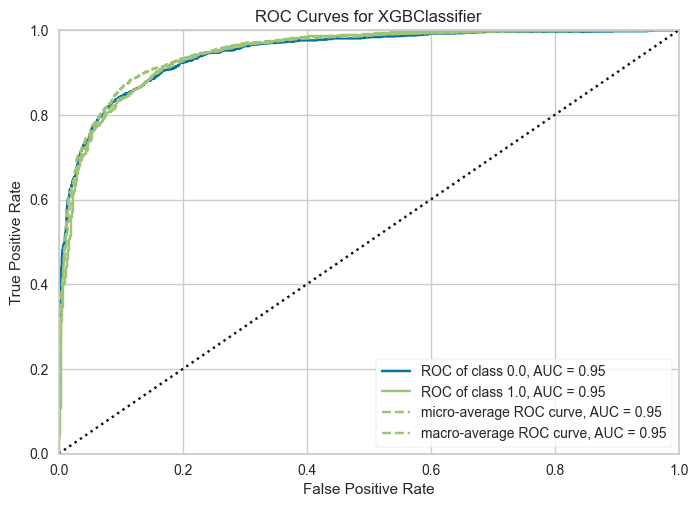

In [6]:
exp.plot_model(exp_model, plot='auc')

### Feature importance

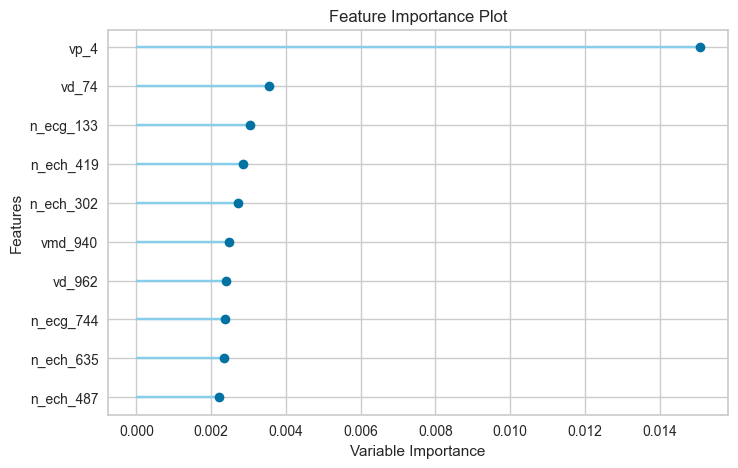

In [7]:
exp.plot_model(exp_model, plot='feature')

## Interpret model

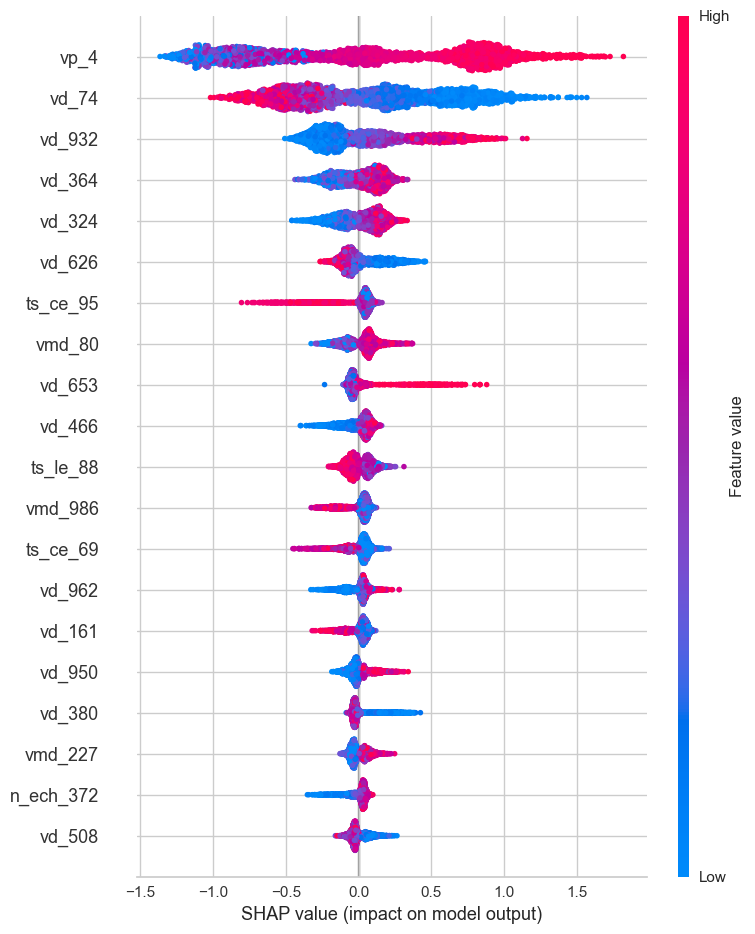

In [8]:
exp.interpret_model(exp_model, plot='summary')